# 1. Описание базы данных
`База данных представляет собой информацию о винах, их дегустации, его стоимости, место изготовки итд`

1. `country` - Страна производства
2. `description` - Описание
3. `designation` - Виноградник на территории винодельни, где выращивают виноград, из которого производится вино.
4. `points` - Количество баллов, по шкале от 1 до 100 
5. `price` - Цена
6. `province` - Провинция или штат, откуда вино
7. `region_1` - Винодельческий район в провинции или штате
8. `region_2` - Конкретные регионы 
9. `taster_name` - Кто тестировал
10. `taster_twitter_handle` - Отзыв
11. `title` - Описание
12. `variety` - Разнообразие
13. `winery` - Винодельня


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('winemag-data-130k-v2.csv', sep=",")

In [6]:
print("Размер таблицы: ", data.shape)

Размер таблицы:  (129971, 14)


In [7]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [8]:
# Сумма пропущенных значений
isnull = data.isnull().sum()
print(isnull)

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [9]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# 2. Обработка данных
## 2.1. Удаление значений

In [10]:
# Удаление столбцов
newdata1 = data.dropna(axis=1)
newdata1.shape

(129971, 5)

In [11]:
newdata1.dtypes

Unnamed: 0      int64
description    object
points          int64
title          object
winery         object
dtype: object

In [12]:
# Удаление строк
newdata2 = data.dropna(axis=0)
newdata2.shape

(22387, 14)

In [13]:
mass1 = []
mass2 = []
mass3 = []
for key in isnull.keys():
    elem = []
    if isnull[key] != 0:
        elem.append(key)
        elem.append(data[key].dtype)
        elem.append(isnull[key])
        elem.append(round(isnull[key] / data.shape[0] * 100, 5))
        mass1.append(elem)
    if isnull[key] != 0 and (str(data[key].dtype) == 'float64' or str(data[key].dtype) == 'int64'):
        mass2.append(elem)
    if isnull[key] != 0 and str(data[key].dtype) == 'object':
        mass3.append(elem)
data_num_obj = []
for key in mass1:
    data_num_obj.append(key[0])
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

country - object - (63) 0.04847%
designation - object - (37465) 28.82566%
price - float64 - (8996) 6.92154%
province - object - (63) 0.04847%
region_1 - object - (21247) 16.34749%
region_2 - object - (79460) 61.13672%
taster_name - object - (26244) 20.1922%
taster_twitter_handle - object - (31213) 24.01536%
variety - object - (1) 0.00077%


In [14]:
data_num = []
for key in mass2:
    data_num.append(key[0])
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

price - float64 - (8996) 6.92154%


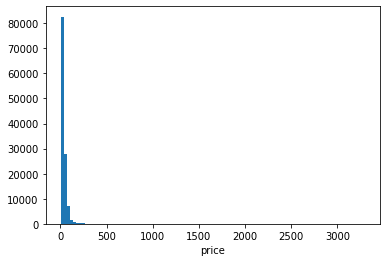

In [15]:
for key in mass2:
    plt.hist(data[key[0]], 100)
    plt.xlabel(key[0])
    plt.show()

# SimpleImputer

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
sort_null_data = data[data_num]
data_price = sort_null_data[['price']]
data_price.head()

,price
0,NaN
1,15.0
2,14.0
3,13.0
4,65.0


In [18]:
implicator = MissingIndicator()
values = implicator.fit_transform(data_price)
values

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
strategies = ['mean', 'median', 'most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_price)
    return data_num_imp[values]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([35.36338913, 35.36338913, 35.36338913, ..., 35.36338913,
        35.36338913, 35.36338913]))

In [22]:
strategies[1], test_num_impute(strategies[1])

('median', array([25., 25., 25., ..., 25., 25., 25.]))

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([20., 20., 20., ..., 20., 20., 20.]))

# Обработка категориальных признаков

In [24]:
for key in mass3:
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

country - object - (63) 0.04847%
designation - object - (37465) 28.82566%
province - object - (63) 0.04847%
region_1 - object - (21247) 16.34749%
region_2 - object - (79460) 61.13672%
taster_name - object - (26244) 20.1922%
taster_twitter_handle - object - (31213) 24.01536%
variety - object - (1) 0.00077%


In [25]:
sort_null_data_obj = data[data_num_obj]
data_region = sort_null_data_obj[['region_1']]
data_region.head()

,region_1
0,Etna
1,NaN
2,Willamette Valley
3,Lake Michigan Shore
4,Willamette Valley


In [26]:
implicator = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
reion_values = implicator.fit_transform(data_region)
reion_values

array([['Etna'],
       ['NA'],
       ['Willamette Valley'],
       ...,
       ['Alsace'],
       ['Alsace'],
       ['Alsace']], dtype=object)

In [27]:
np.unique(reion_values)

array(['Abruzzo', 'Adelaida District', 'Adelaide', ...,
       'Yorkville Highlands', 'Yountville', 'Zonda Valley'], dtype=object)

# Кодирование категориальных признаков

In [69]:
data_frame = pd.DataFrame({'region': reion_values.T[0]})

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [74]:
le = LabelEncoder()
data_label_en = le.fit_transform(data_frame)

In [75]:
data_frame['region'].unique()

array(['Etna', 'NA', 'Willamette Valley', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

In [76]:
data_label_en

array([ 424,  738, 1218, ...,   21,   21,   21])

In [78]:
one = OneHotEncoder()
data_label_hot = one.fit_transform(data_frame)

In [79]:
data_label_hot

<129971x1230 sparse matrix of type '<class 'numpy.float64'>'
	with 129971 stored elements in Compressed Sparse Row format>

In [80]:
data_label_hot.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
data_frame.head(10)

,region
0,Etna
1,NA
2,Willamette Valley
3,Lake Michigan Shore
4,Willamette Valley
5,Navarra
6,Vittoria
7,Alsace
8,NA
9,Alsace


### С помощью Pands

In [83]:
pd.get_dummies(data_frame).head()

,region_Abruzzo,region_Adelaida District,region_Adelaide,region_Adelaide Hills,region_Adelaide Plains,region_Aglianico d'Irpinia,region_Aglianico del Beneventano,region_Aglianico del Taburno,region_Aglianico del Vulture,region_Agrelo,...,region_Yadkin Valley,region_Yakima Valley,region_Yamhill County,region_Yarra Valley,region_Yecla,region_Yolo County,region_York Mountain,region_Yorkville Highlands,region_Yountville,region_Zonda Valley
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
pd.get_dummies(data_frame, dummy_na=True).head()


,region_Abruzzo,region_Adelaida District,region_Adelaide,region_Adelaide Hills,region_Adelaide Plains,region_Aglianico d'Irpinia,region_Aglianico del Beneventano,region_Aglianico del Taburno,region_Aglianico del Vulture,region_Agrelo,...,region_Yakima Valley,region_Yamhill County,region_Yarra Valley,region_Yecla,region_Yolo County,region_York Mountain,region_Yorkville Highlands,region_Yountville,region_Zonda Valley,region_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Маштабирование данных

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [89]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['price']])

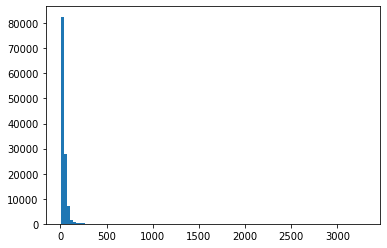

In [92]:
plt.hist(data[['price']], 100)
plt.show()

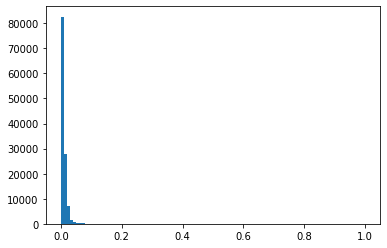

In [93]:
plt.hist(sc1_data, 100)
plt.show()

In [94]:
sc2 = StandardScaler()
sc2_data = sc1.fit_transform(data[['price']])

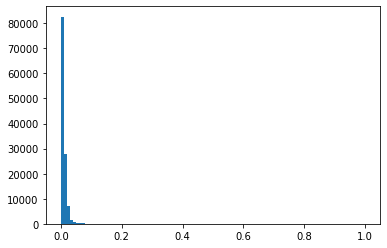

In [95]:
plt.hist(sc2_data, 100)
plt.show()